In [ ]:
import cv2
print(cv2.__version__)

4.10.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

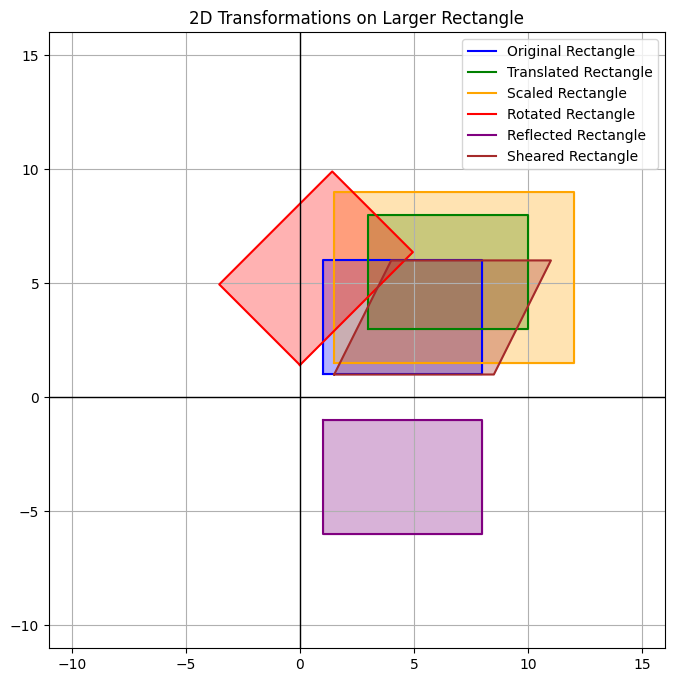

In [ ]:
rectangle = np.array([
    [1, 1, 1],
    [8, 1, 1],
    [8, 6, 1],
    [1, 6, 1],
    [1, 1, 1]
])

# Define the transformation matrices
def translation(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

def scaling(sx, sy):
    return np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])

def rotation(theta):
    rad = np.deg2rad(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])

def reflection_x():
    return np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])

def shearing(sh_x, sh_y):
    return np.array([[1, sh_x, 0], [sh_y, 1, 0], [0, 0, 1]])

# Apply transformations to the rectangle
def apply_transformation(vertices, transformation_matrix):
    transformed_vertices = np.dot(vertices, transformation_matrix.T)
    return transformed_vertices

# Example transformations
T_translation = translation(2, 2)
T_scaling = scaling(1.5, 1.5)
T_rotation = rotation(45)
T_reflection = reflection_x()
T_shearing = shearing(0.5, 0)

# Apply each transformation
transformed_translation = apply_transformation(rectangle, T_translation)
transformed_scaling = apply_transformation(rectangle, T_scaling)
transformed_rotation = apply_transformation(rectangle, T_rotation)
transformed_reflection = apply_transformation(rectangle, T_reflection)
transformed_shearing = apply_transformation(rectangle, T_shearing)

# Plotting all transformed objects
def plot_object(vertices, color, label):
    plt.plot(vertices[:, 0], vertices[:, 1], color=color, label=label)
    plt.fill(vertices[:, 0], vertices[:, 1], color=color, alpha=0.3)

plt.figure(figsize=(10, 8))
plot_object(rectangle, 'blue', 'Original Rectangle')
plot_object(transformed_translation, 'green', 'Translated Rectangle')
plot_object(transformed_scaling, 'orange', 'Scaled Rectangle')
plot_object(transformed_rotation, 'red', 'Rotated Rectangle')
plot_object(transformed_reflection, 'purple', 'Reflected Rectangle')
plot_object(transformed_shearing, 'brown', 'Sheared Rectangle')

plt.xlim(-11, 16)
plt.ylim(-11, 16)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("2D Transformations on Larger Rectangle")
plt.show()

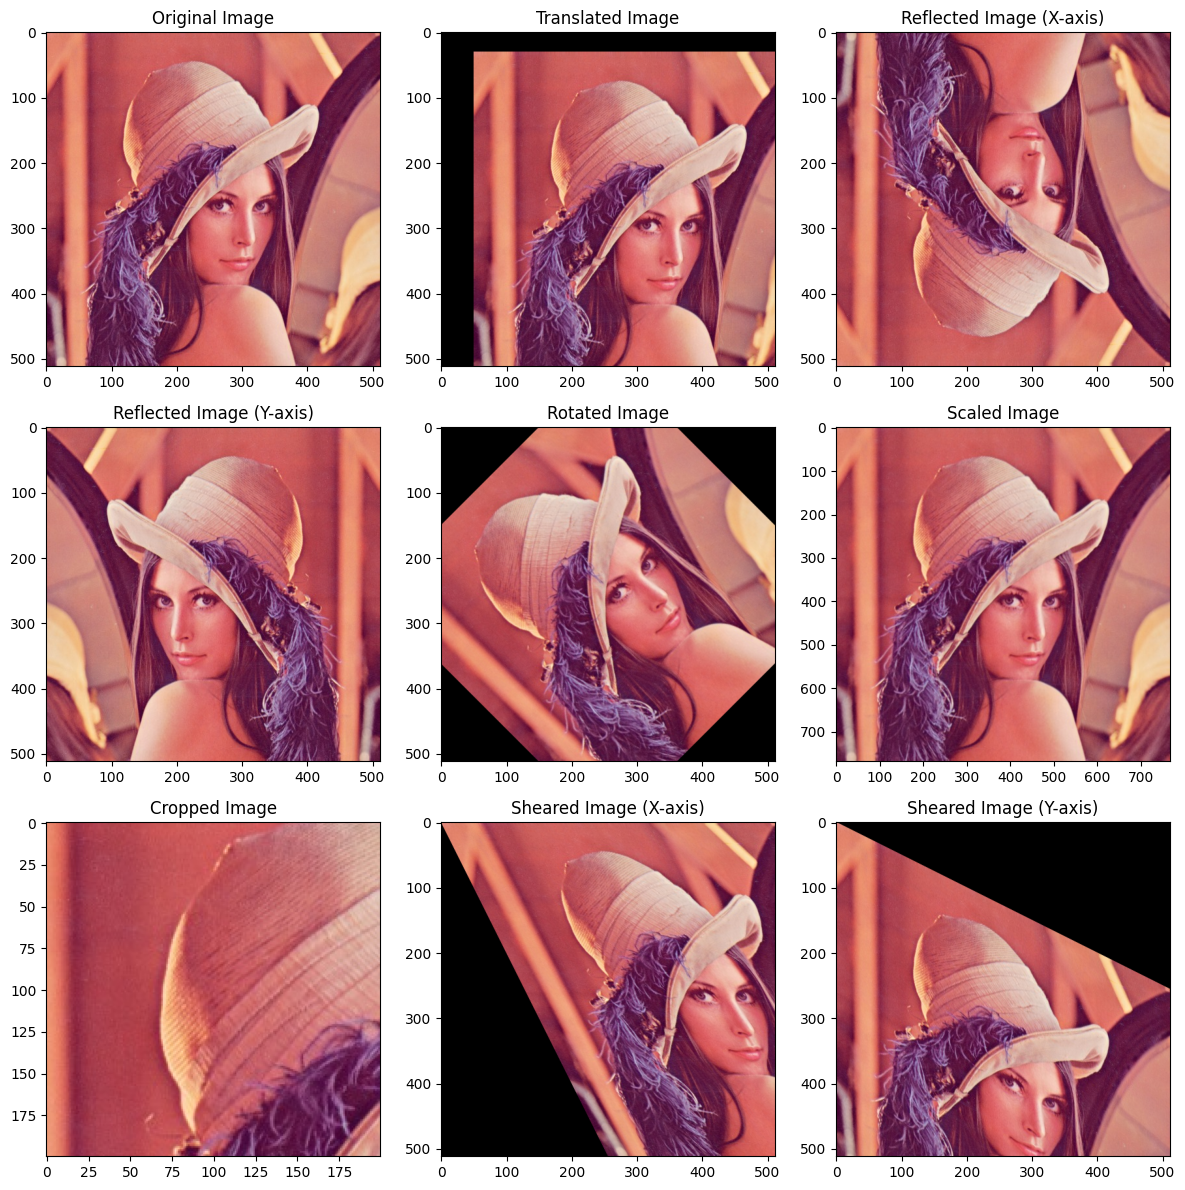

In [ ]:
image = cv2.imread('/content/img1.16.12 AM.jpeg')

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols, _ = image.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

# 2. Image Reflection
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)
    else:
        return cv2.flip(image, -1)

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# 4. Image Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy)
    return scaled_image

# 5. Image Cropping
def crop_image(image, x, y, width, height):
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image

# 6. Shearing in X-axis
def shear_x(image, shear_factor):
    rows, cols, _ = image.shape
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, shear_matrix, (cols, rows))
    return sheared_image_x

# 7. Shearing in Y-axis
def shear_y(image, shear_factor):
    rows, cols, _ = image.shape
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image_y = cv2.warpAffine(image, shear_matrix, (cols, rows))
    return sheared_image_y

# Image Translation
translated_image = translate_image(image, 50, 30)

# Image Reflection
reflected_image_x = reflect_image(image, 'x')
reflected_image_y = reflect_image(image, 'y')

# Image Rotation
rotated_image = rotate_image(image, 45)

# Image Scaling
scaled_image = scale_image(image, 1.5, 1.5)

# Image Cropping
cropped_image = crop_image(image, 50, 50, 200, 200)

# Shearing in X-axis
sheared_image_x = shear_x(image, 0.5)

# Shearing in Y-axis
sheared_image_y = shear_y(image, 0.5)

plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(reflected_image_x, cv2.COLOR_BGR2RGB))
plt.title('Reflected Image (X-axis)')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(reflected_image_y, cv2.COLOR_BGR2RGB))
plt.title('Reflected Image (Y-axis)')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')

plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image (X-axis)')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image (Y-axis)')

plt.tight_layout()
plt.show()